## 1.Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [3]:
#print(pd.__version__)
#print("Pandas version:", pd.__version__)
#print("Seaborn version:", sns.__version__)
#print("matplotlib version:", plt.__version__)

In [4]:
# Correlation coefficient functions
from scipy.stats import pearsonr, spearmanr, kendalltau
# Ordinary Least Square
from statsmodels.formula.api import ols
# statistic model
import statsmodels.api as sm
# Dataset partitioning
from sklearn.model_selection import train_test_split
# Dataset standardization
from sklearn.preprocessing import StandardScaler

In [5]:
from functools import reduce

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
path_url = '/Users/hazelran/Desktop/LCK_SummerPlayoffs_2024.csv'
df_lol = pd.read_csv(path_url, sep=';')

In [8]:
pd.set_option('display.max_columns', None)

## 2. Dataset Overview

In [9]:
# Overview Function
def dataset_overview(df):
    # 2) summary
    print("                       --- Summary ---\n")
    print(f" - Number of Rows: {df.shape[0]}")
    print(f" - Number of Columns: {df.shape[1]}")
    print(f" - Size of Dataset: {df.memory_usage().sum() / 1024:.2f} KB")
    print(f" - Missing Values: {df.isnull().sum().sum()} total missing values")
    print(" - Data Types:")
    print(df.dtypes.value_counts())
    print("\n")

    # 3) rundown of dataset
    print("                       --- Dataset Overview ---\n")
    data_overview = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.count(),
        'Unique Values': df.nunique()
    })
    print(data_overview)
    print("\n")
          
    # 3) chosen statistics
    print("3. General Statistics")
    print(df.iloc[:,15:].describe())
    print("\n")

In [10]:
print("                       --- Dataframe - Quick Look ---\n")
df_lol.head(5)

                       --- Dataframe - Quick Look ---



,Player,Role,Team,Opponent Team,Opponent Player,Date,Round,Day,Patch,Stage,No Game,all Games,Format,Game of day,Side,Time,Ban,Ban Opponent,Pick,Pick Opponent,Champion,Champion Opponent,Outcome,Kills Team,Turrets Team,Dragon Team,Baron Team,Level,Kills,Deaths,Assists,KDA,CS,CS in Teams Jungle,CS in Enemy Jungle,CSM,Golds,GPM,GOLD%,Vision Score,Wards placed,Wards destroyed,Control Wards Purchased,Detector Wards Placed,VSPM,WPM,VWPM,WCPM,VS%,Total damage to Champion,Physical Damage,Magic Damage,True Damage,DPM,DMG%,K+A Per Minute,KP%,Solo kills,Double kills,Triple kills,Quadra kills,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Objectives Stolen,Damage dealt to turrets,Damage dealt to buildings,Total heal,Total Heals On Teammates,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,kingen,TOP,DK,FOX,Clear,23.08.2024,1,1,v14.16,Summer_Playoffs_24,1,4,5,1,Blue,00:32:19,Renekton,LeBlanc,Rumble,Ashe,Rumble,Ornn,Win,12,9,2,2,16,1,4,6,1.8,234,12,0,7.2,11657,361,0.186,40,12,7,7,7,1.24,0.37,0.22,0.22,0.141,19064,510,18489,65,590,0.270,0.22,0.583,0,0,0,0,0,5,19,-328,0,0,4807,4807,5350,580,19400,0,10,284,19531,127,9,27,100,50
1,Lucid,JUNGLE,DK,FOX,Raptor,23.08.2024,1,1,v14.16,Summer_Playoffs_24,1,4,5,1,Blue,00:32:19,Zyra,Maokai,Nasus,Azir,Ivern,Xin_Zhao,Win,12,9,2,2,15,0,0,10,Perfect_KDA,176,166,0,5.4,11102,344,0.178,53,16,9,15,14,1.64,0.50,0.46,0.28,0.187,3175,919,883,1373,98,0.045,0.31,0.833,0,0,0,0,0,261,12,127,0,0,1018,1018,10703,1886,12800,8507,24,194,10939,0,16,33,0,0
2,ShowMaker,MID,DK,FOX,Clozer,23.08.2024,1,1,v14.16,Summer_Playoffs_24,1,4,5,1,Blue,00:32:19,Vi,Lillia,Ivern,Ornn,Nasus,Azir,Win,12,9,2,2,18,4,1,4,8,311,12,0,9.6,15013,465,0.240,48,9,15,7,7,1.49,0.28,0.22,0.46,0.169,15192,8181,6553,458,470,0.215,0.25,0.667,0,0,0,0,0,-306,-4,75,0,0,5753,5753,11432,0,29520,0,12,967,24498,0,9,24,0,650
3,Aiming,ADCARRY,DK,FOX,Hena,23.08.2024,1,1,v14.16,Summer_Playoffs_24,1,4,5,1,Blue,00:32:19,Viego,Ezreal,Smolder,Xin_Zhao,Smolder,Ashe,Win,12,9,2,2,17,7,0,2,Perfect_KDA,348,12,0,10.8,16474,510,0.264,44,14,15,4,4,1.36,0.43,0.12,0.46,0.155,29786,21509,4031,4246,922,0.421,0.28,0.750,0,0,1,0,0,481,15,-130,0,0,7352,7352,6575,0,8901,0,10,340,13129,0,5,28,50,0
4,Moham,SUPPORT,DK,FOX,Duro,23.08.2024,1,1,v14.16,Summer_Playoffs_24,1,4,5,1,Blue,00:32:19,Braum,Miss_Fortune,Rell,Seraphine,Rell,Seraphine,Win,12,9,2,2,13,0,2,10,5,25,0,0,0.8,8265,256,0.132,99,58,11,19,19,3.06,1.79,0.59,0.34,0.349,3507,563,2460,484,109,0.050,0.31,0.833,0,0,0,0,0,-128,1,-532,-1,0,4086,4086,784,0,12291,0,20,38,13015,56,21,33,0,0


In [11]:
dataset_overview(df_lol)

                       --- Summary ---

 - Number of Rows: 310
 - Number of Columns: 81
 - Size of Dataset: 196.30 KB
 - Missing Values: 2 total missing values
 - Data Types:
int64      52
object     19
float64    10
Name: count, dtype: int64


                       --- Dataset Overview ---

                          Data Type  Non-Null Count  Unique Values
Player                       object             310             30
Role                         object             310              5
Team                         object             310              6
Opponent Team                object             310              6
Opponent Player              object             310             30
...                             ...             ...            ...
Total Time Spent Dead         int64             310            132
Consumables purchased         int64             310             32
Items Purchased               int64             310             32
Shutdown bounty collected     int64 

In [12]:
## 2 total missing values

In [13]:
# Filter out rows with missing values
missing_data_rows = df_lol[df_lol.isna().any(axis=1)]
# print(missing_data_rows)

print("                 --- Missing Values ---\n")
print(missing_data_rows[['Player','Team','Opponent Team','Ban','Ban Opponent']])

                 --- Missing Values ---

    Player Team Opponent Team       Ban Ban Opponent
194  Keria   T1            DK  Renekton          NaN
199  Moham   DK            T1       NaN     Renekton


Reason: Missing values because of empty ban

## 3. Vision Score

### 3.1 Game Time Across Matches

In [14]:
time_type = df_lol["Time"].dtype

print(f"Match Time Data Type: {time_type}")

Match Time Data Type: object


In [15]:
# Convert match time data type
df_lol["Match_Time"] = pd.to_timedelta(df_lol["Time"])
df_lol["Match_Time_Secs"] = pd.to_timedelta(df_lol["Time"]).dt.total_seconds()

In [16]:
#print(df_lol["Match_Time_Secs"].isna().sum())

In [17]:
#print(df_lol["Match_Time_Secs"].unique())

#### 3.1.1 Mean Time

In [18]:
# mt (mean time) across secs, mins, hours
mt_secs = (df_lol["Match_Time_Secs"].mean()).round(2)
mt_mins = (df_lol["Match_Time_Secs"].mean()/60).round(2)
mt_hours = (df_lol["Match_Time_Secs"].mean()/3600).round(2)

In [19]:
print("Mean time of all Game Matches")
tab_data1 = [
    #["Seconds", mt_secs],
    ["Minutes", mt_mins],
    #["Hours", mt_hours]
]

print(tabulate(tab_data1, headers=["Unit of Time", "Value"], tablefmt="grid"))

Mean time of all Game Matches
+----------------+---------+
| Unit of Time   |   Value |
+================+=========+
| Minutes        |   32.94 |
+----------------+---------+


#### 3.1.2 Max and Min

In [20]:
# max&min across secs, mins, hours
max_time_secs = df_lol["Match_Time_Secs"].max().round(2)
min_time_secs = df_lol["Match_Time_Secs"].min().round(2)

In [21]:
# Convert seconds to minutes and hours
max_time_mins = (max_time_secs / 60).round(2)
min_time_mins = (min_time_secs / 60).round(2)

max_time_hours = (max_time_secs / 3600).round(2)
min_time_hours = (min_time_secs / 3600).round(2)

In [22]:
print("Longest and Shortest Game Match Times")
tab_data2 = [
    #["Max Time (Seconds)", max_time_secs],
    ["Max Time (Minutes)", max_time_mins],
    #["Max Time (Hours)", max_time_hours],
    #["Min Time (Seconds)", min_time_secs],
    ["Min Time (Minutes)", min_time_mins],
    #["Min Time (Hours)", min_time_hours]
]

print(tabulate(tab_data2, headers=["Type", "Value"], tablefmt="grid"))

Longest and Shortest Game Match Times
+--------------------+---------+
| Type               |   Value |
+====================+=========+
| Max Time (Minutes) |   49.68 |
+--------------------+---------+
| Min Time (Minutes) |   23.13 |
+--------------------+---------+


Results: Total game lenth across all games is within logically expected timeframes.

### 3.2 Wins and Team Map Side

In [23]:
df_blue = df_lol[df_lol["Side"] == "Blue"]
df_red = df_lol[df_lol["Side"] == "Red"]
win_blue = df_blue[df_blue["Outcome"] == "Win"]
win_red = df_red[df_red["Outcome"] == "Win"]

print(f"Total Victories for Teams starting in Blue Side: {win_blue.shape[0]}")
print(f"Total Victories for Teams starting in Red Side: {win_red.shape[0]}")

Total Victories for Teams starting in Blue Side: 85
Total Victories for Teams starting in Red Side: 70


Results: Blue sides appear to have an advantage in Summer playoff
         This usually due to map path options and the fact that the Blue side has relatively easier access to Baron, which is crucial at late game, while the red side has an easier access to Dragons. But there is a new significant factor ---- Voidgrubs

#### 3.2.1 Data Aggregation:  Vision, Jungle, Support and Gold
      

Jungle and Support are expected to roam the map, assisting all lanes, preparing and securing objectives. They play the entire map as opposed to a single lane

In [24]:
wb_vs = win_blue["Vision Score"].mean().round(1)
wr_vs = win_red["Vision Score"].mean().round(1)

print(f"Average Vision Score of Winning Blue-Side: {wb_vs}")
print(f"Average Vision Score of Winning Red-Side: {wr_vs}")

Average Vision Score of Winning Blue-Side: 62.4
Average Vision Score of Winning Red-Side: 59.4


##### 3.2.1.1 Jungle Vision Score

In [25]:
win_blue_j = win_blue[win_blue["Role"] == "JUNGLE"]
win_red_j = win_red[win_red["Role"] == "JUNGLE"]

# jv(i.e. jungler vision)
jv_blue = win_blue_j["Vision Score"].mean().round(1)
jv_red = win_red_j["Vision Score"].mean().round(1)

print(f"Average Vision Score of Winning Blue-Side Junglers: {jv_blue}")
print(f"Average Vision Score of Winning Red-Side Junglers: {jv_red}")

Average Vision Score of Winning Blue-Side Junglers: 58.7
Average Vision Score of Winning Red-Side Junglers: 51.4


##### 3.2.1.2 Support Vision Score

In [26]:
win_blue_s = win_blue[win_blue["Role"] == "SUPPORT"]
win_red_s = win_red[win_red["Role"] == "SUPPORT"]

# sv(i.e. support vision)
sv_blue = win_blue_s["Vision Score"].mean().round(1)
sv_red = win_red_s["Vision Score"].mean().round(1)

print(f"Average Vision Score of Winning Blue-Side Supports: {sv_blue}")
print(f"Average Vision Score of Winning Red-Side Supports: {sv_red}")

Average Vision Score of Winning Blue-Side Supports: 125.0
Average Vision Score of Winning Red-Side Supports: 119.9


##### 3.2.1.3 Gold Per Minute

In [27]:
gpm_blue = win_blue["GPM"].mean().round(1)
gpm_red = win_red["GPM"].mean().round(1)

print(f"Average Gold per Minute for Winning Blue-Side: {gpm_blue}")
print(f"Average Gold per Minute for Winning Red-Side: {gpm_red}")

Average Gold per Minute for Winning Blue-Side: 394.1
Average Gold per Minute for Winning Red-Side: 394.9


##### 3.2.1.4 CC(Crowd control)

In [28]:
cc_blue = win_blue["Total Time CC Dealt"].mean().round(1)
cc_red = win_red["Total Time CC Dealt"].mean().round(1)

print(f"Average CC time dealt to enemies Winning Blue-Side: {cc_blue}")
print(f"Average CC time dealt to enemies Winning Red-Side: {cc_red}")

Average CC time dealt to enemies Winning Blue-Side: 342.8
Average CC time dealt to enemies Winning Red-Side: 352.4


In [29]:
tab_data2 = [
    ['Blue', win_blue.shape[0], wb_vs, jv_blue,sv_blue, gpm_blue, cc_blue],
    ['Red', win_red.shape[0], wr_vs, jv_red,sv_red, gpm_red, cc_red]
]

tab_stats = (tabulate(tab_data2, headers=["Side", 'Wins', "Avg Vis", "Avg Jgl Vis", "Avg GPM", "Avg CC Dealt" ],tablefmt="grid"))
print(tab_stats)

+------+--------+--------+-----------+---------------+-----------+----------------+
|      |   Side |   Wins |   Avg Vis |   Avg Jgl Vis |   Avg GPM |   Avg CC Dealt |
+======+========+========+===========+===============+===========+================+
| Blue |     85 |   62.4 |      58.7 |         125   |     394.1 |          342.8 |
+------+--------+--------+-----------+---------------+-----------+----------------+
| Red  |     70 |   59.4 |      51.4 |         119.9 |     394.9 |          352.4 |
+------+--------+--------+-----------+---------------+-----------+----------------+


##### 3.2.1.5 Losing sides data

In [30]:
lose_blue = df_lol[(df_lol["Side"] == "Blue") & (df_lol["Outcome"] == "Loss")]
lose_red = df_lol[(df_lol["Side"] == "Red") & (df_lol["Outcome"] == "Loss")]

lb_vs = lose_blue["Vision Score"].mean().round(1)
lr_vs = lose_red["Vision Score"].mean().round(1)

gpm_lose_blue = lose_blue["GPM"].mean().round(1)
gpm_lose_red = lose_red["GPM"].mean().round(1)

cc_lose_blue = lose_blue["Total Time CC Dealt"].mean().round(1)
cc_lose_red = lose_red["Total Time CC Dealt"].mean().round(1)

lose_blue_j = lose_blue[lose_blue["Role"] == "JUNGLE"]
lose_red_j = lose_red[lose_red["Role"] == "JUNGLE"]

jv_lose_blue = lose_blue_j["Vision Score"].mean().round(1)
jv_lose_red = lose_red_j["Vision Score"].mean().round(1)

# Healing and Damage to Buildings

total_heal_blue = win_blue["Total heal"].mean().round(1)
total_heal_red = win_red["Total heal"].mean().round(1)

damage_buildings_blue = win_blue["Damage dealt to buildings"].mean().round(1)
damage_buildings_red = win_red["Damage dealt to buildings"].mean().round(1)

total_heal_lose_blue = lose_blue["Total heal"].mean().round(1)
total_heal_lose_red = lose_red["Total heal"].mean().round(1)

damage_buildings_lose_blue = lose_blue["Damage dealt to buildings"].mean().round(1)
damage_buildings_lose_red = lose_red["Damage dealt to buildings"].mean().round(1)

tab_data2 = [
    ['Blue Wins', win_blue.shape[0], wb_vs, jv_blue, gpm_blue, cc_blue, total_heal_blue, damage_buildings_blue],
    ['Red Wins', win_red.shape[0], wr_vs, jv_red, gpm_red, cc_red, total_heal_red, damage_buildings_red],
    ['Blue Losses', lose_blue.shape[0], lb_vs, jv_lose_blue, gpm_lose_blue, cc_lose_blue, total_heal_lose_blue, damage_buildings_lose_blue],
    ['Red Losses', lose_red.shape[0], lr_vs, jv_lose_red, gpm_lose_red, cc_lose_red, total_heal_lose_red, damage_buildings_lose_red]
]

master_tab_stats = tabulate(tab_data2, headers=["Side", 'Games', "Vision", "Jung_Vis", "GPM", "CC", "Heal", "Build Dmg"], tablefmt="grid")

print("Games: Number of Games, \n"
      "Vision: Vision Score, \n"
      "Jung_Vis: Jungler Vision Score, \n"
      "GPM: Average GPM, \n"
      "CC: Average Crowd Control, \n"
      "Heal: Average Team Heal, \n"
      "Build Dmg: Building Damage(including Turrets)")
print(master_tab_stats)

Games: Number of Games, 
Vision: Vision Score, 
Jung_Vis: Jungler Vision Score, 
GPM: Average GPM, 
CC: Average Crowd Control, 
Heal: Average Team Heal, 
Build Dmg: Building Damage(including Turrets)
+-------------+---------+----------+------------+-------+-------+--------+-------------+
| Side        |   Games |   Vision |   Jung_Vis |   GPM |    CC |   Heal |   Build Dmg |
+=============+=========+==========+============+=======+=======+========+=============+
| Blue Wins   |      85 |     62.4 |       58.7 | 394.1 | 342.8 | 9130.6 |      5230.9 |
+-------------+---------+----------+------------+-------+-------+--------+-------------+
| Red Wins    |      70 |     59.4 |       51.4 | 394.9 | 352.4 | 8410.8 |      5362.4 |
+-------------+---------+----------+------------+-------+-------+--------+-------------+
| Blue Losses |      70 |     57.7 |       51.6 | 337.6 | 383.8 | 7655.7 |      2129.6 |
+-------------+---------+----------+------------+-------+-------+--------+-------------+

#### 3.2.2 Deeper insights, vision, jungle

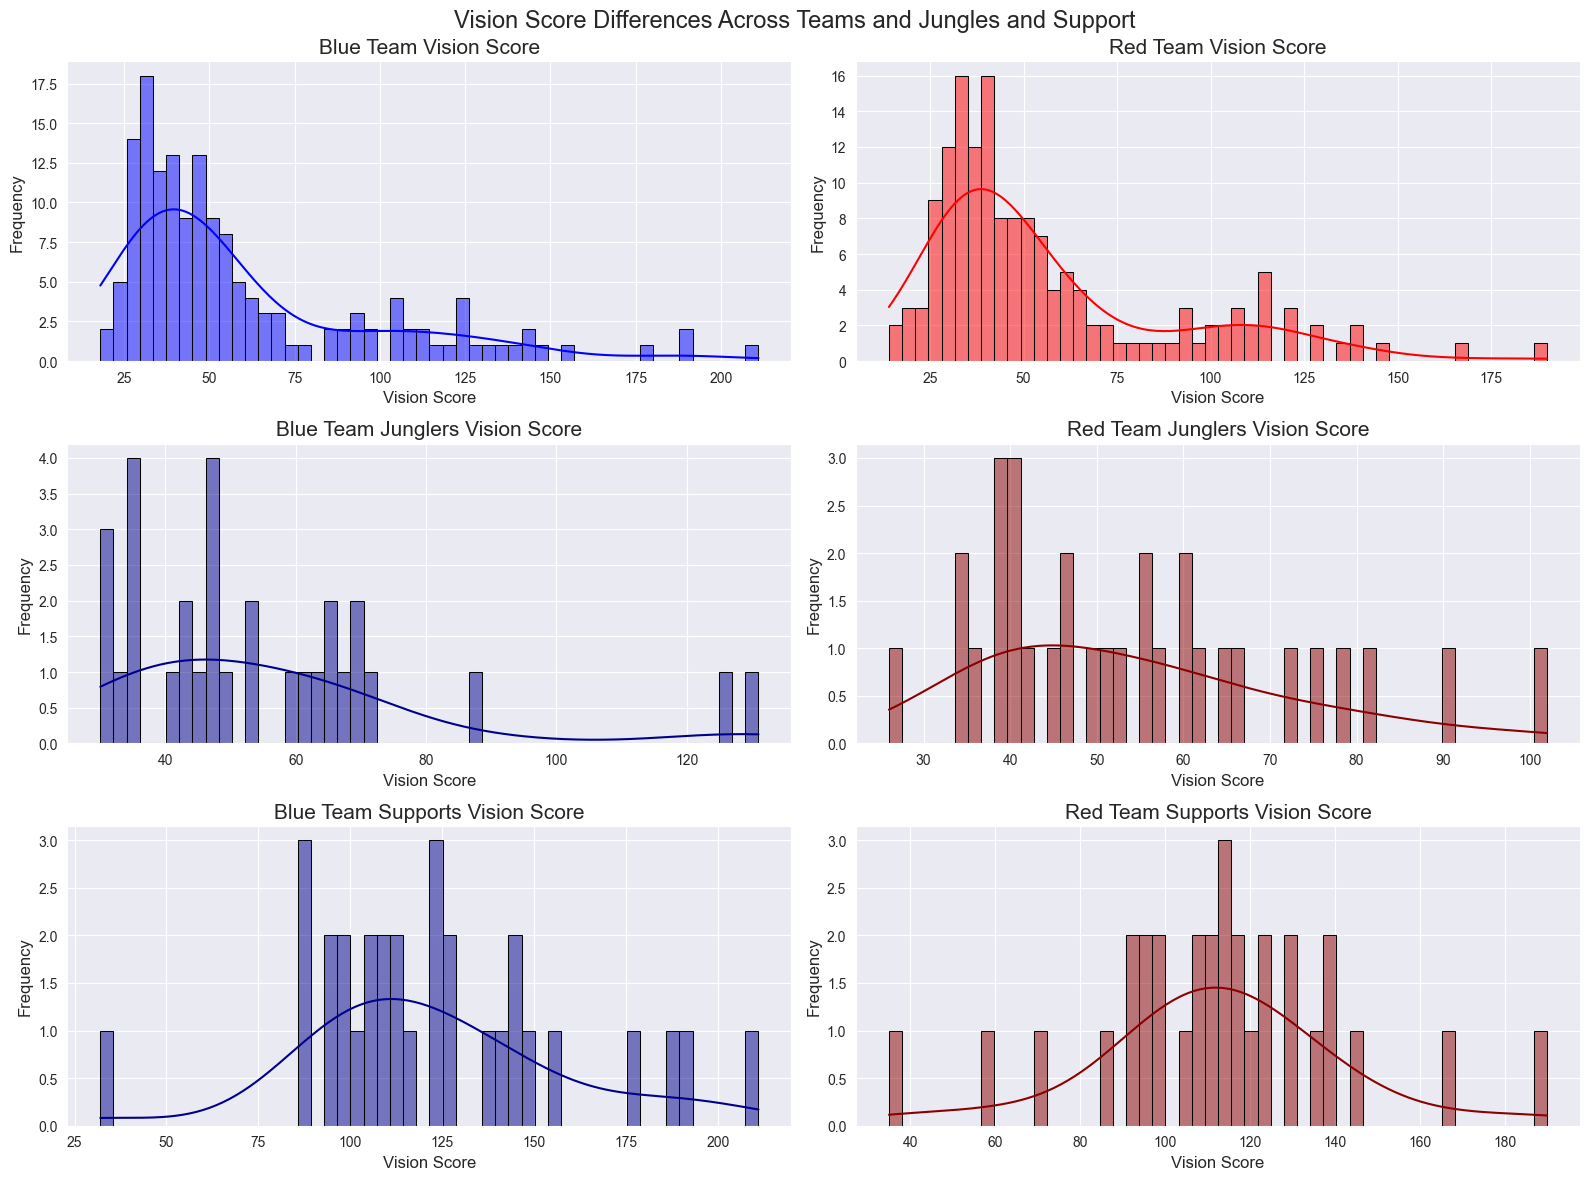

In [31]:
blue_j = df_blue[df_blue["Role"] == "JUNGLE"]
red_j = df_red[df_red["Role"] == "JUNGLE"]

blue_s = df_blue[df_blue["Role"] == "SUPPORT"]
red_s = df_red[df_red["Role"] == "SUPPORT"]

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Blue side
sns.histplot(df_blue["Vision Score"], kde=True, color="blue", bins=50, edgecolor="black", ax=axes[0,0])
axes[0,0].set_title("Blue Team Vision Score", fontsize=15)
axes[0,0].set_xlabel("Vision Score", fontsize=12)
axes[0,0].set_ylabel("Frequency", fontsize=12)
axes[0,0].grid(True) 

# Red side
sns.histplot(df_red["Vision Score"], kde=True, color="red", bins=50, edgecolor="black", ax=axes[0,1])
axes[0,1].set_title("Red Team Vision Score", fontsize=15)
axes[0,1].set_xlabel("Vision Score", fontsize=12)
axes[0,1].set_ylabel("Frequency", fontsize=12)
axes[0,1].grid(True) 

# Blue junglers
sns.histplot(blue_j["Vision Score"], kde=True, color="darkblue", bins=50, edgecolor="black", ax=axes[1,0])
axes[1,0].set_title("Blue Team Junglers Vision Score", fontsize=15)
axes[1,0].set_xlabel("Vision Score", fontsize=12)
axes[1,0].set_ylabel("Frequency", fontsize=12)
axes[1,0].grid(True) 

# Red junglers
sns.histplot(red_j["Vision Score"], kde=True, color="darkred", bins=50, edgecolor="black", ax=axes[1,1])
axes[1,1].set_title("Red Team Junglers Vision Score", fontsize=15)
axes[1,1].set_xlabel("Vision Score", fontsize=12)
axes[1,1].set_ylabel("Frequency", fontsize=12)
axes[1,1].grid(True) 

# Blue support
sns.histplot(blue_s["Vision Score"], kde=True, color="darkblue", bins=50, edgecolor="black", ax=axes[2,0])
axes[2,0].set_title("Blue Team Supports Vision Score", fontsize=15)
axes[2,0].set_xlabel("Vision Score", fontsize=12)
axes[2,0].set_ylabel("Frequency", fontsize=12)
axes[2,0].grid(True) 

# Red support
sns.histplot(red_s["Vision Score"], kde=True, color="darkred", bins=50, edgecolor="black", ax=axes[2,1])
axes[2,1].set_title("Red Team Supports Vision Score", fontsize=15)
axes[2,1].set_xlabel("Vision Score", fontsize=12)
axes[2,1].set_ylabel("Frequency", fontsize=12)
axes[2,1].grid(True) 

plt.suptitle("Vision Score Differences Across Teams and Jungles and Support", fontsize=17)
plt.tight_layout()
plt.show()

Results: Both sides exhibit similar warding and vision strategy patterns with no significant differences that stands out. The same pattern of vision score accumulation also applied to the Jungle and Support for each side with a few variations in skewness.

### 3.3 Gold Stats - Hypothesis Testing, Normality, and Correlational Analysis

#### 3.3.1 Correlation Between Vision Score and GMP

In [32]:
gb = df_blue['GPM'].mean().round(2)
gr = df_red['GPM'].mean().round(2)
diff = (((gr-gb)/gb)*100).round(2)

print(f"Blue Side - Average Gold per Minute: {gb}")
print(f"Red Side - Average Gold per Minute: {gr}")
print(f"%Difference: {diff}%")

Blue Side - Average Gold per Minute: 368.6
Red Side - Average Gold per Minute: 361.77
%Difference: -1.85%


Results: There is a small difference in GPM between the teams but this is also negligible in the late game and can be due to higher map roaming for winning team. I.e. the winning team has access to larger portions of map, therefore a lot easier for player to quickly farm a few camps as opposed to losing teams which are more on the defensive and might be hesitant to even venture outside the borders of their own jungle

#### 3.3.2 Quick Correlational Analysis(Pearson and Spearman)

In [33]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [34]:
x = df_lol["Vision Score"]
y = df_lol["GPM"]

corr_coef, p_val = pearsonr(x,y)
spearman_corr, spearman_p_val = spearmanr(x, y)

print(f"Pearson Correlation Coefficient: {corr_coef:.5f}")
print(f"Pearson P-value: {p_val:.5f}")
print("\n")
print("Also run a non-parametric test that does not assume linearity:")
print(f"Spearman Correlation Coefficient: {spearman_corr:.5f}")
print(f"Spearman P-value: {spearman_p_val:.5f}")

Pearson Correlation Coefficient: -0.60058
Pearson P-value: 0.00000


Also run a non-parametric test that does not assume linearity:
Spearman Correlation Coefficient: -0.47386
Spearman P-value: 0.00000


Results:
I computed both the Pearson and Spearman correlation coefficients to measure the relationship between Vision Score and GPM.
1. Pearson Correlation Coefficient

Pearson Correlation Coefficient: -0.60058 --> indicates a moderately strong negative linear relationship between the two variables. This means that as a player's vision score increases, their GPM tends to decrease, and vice versa.

Pearson P-value: 0.00000 --> A p-value of 0 means the result is statistically significant. In other words, the correlation between Vision Scorre and GPM is no due to random chance but represents a real association.

Conclusion: The Pearson correlation is suited for data that exhibitis a linear relationship, so this result suggests a negative linear relationship between Vision Score and GPM.

2. Spearman Correlation Coefficent

Spearman Correlation Coefficent: -0.47386 --> indicates a moderately strong negative correlation, but this test doesn't assume the relationship is linear. It suggests that even if the relationship isn't perfectly linear, as vision score increases, GPM tends to decrease in a monotonic fashion.

Spearman P-value: 0.00000 --> meaning this result is statistically significant, and the correlation is not likely to be due to chance.

Conclusion: The Spearman correlation is a non-parametric test that does not assume a linear relationship but looks for a monotonic relationship between the variables.


Above all, this may suggest that when players focus on improving vision control(by achieving a high vision score), they might sacrifice some of their gold-earning potential(GPM), possibly because vision control requires time and resources, leading to a reduction in gold income.  
   

#### 3.3.3 Testing for Normality and Correlational Analysis

##### 3.3.3.1 Checking for Linearity

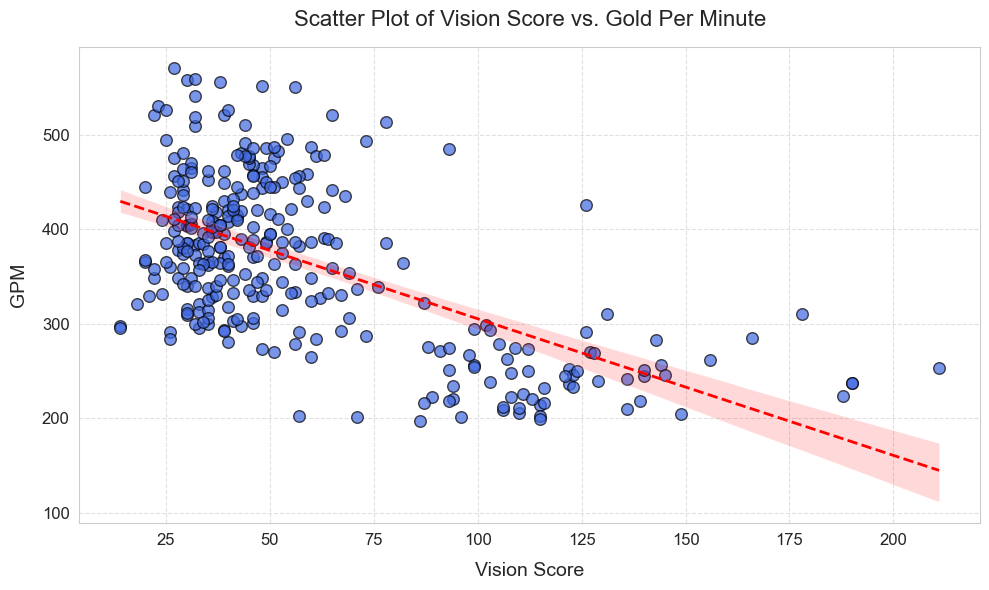

                            OLS Regression Results                            
Dep. Variable:                    GPM   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     173.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           9.02e-32
Time:                        12:51:44   Log-Likelihood:                -1757.0
No. Observations:                 310   AIC:                             3518.
Df Residuals:                     308   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          449.8080      7.558     59.511   

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='royalblue', edgecolor='black', s=70, alpha=0.7)

plt.xlabel('Vision Score', fontsize=14, labelpad=10)
plt.ylabel('Gold per Minute (GPM)', fontsize=14, labelpad=10)
plt.title('Scatter Plot of Vision Score vs. Gold Per Minute', fontsize=16, pad=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.regplot(x=x, y=y, scatter=False, color='red', line_kws={"linewidth":2, "linestyle":"--"})

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# we can then fit a linear regression model, and add a constant for the intercept term
X = sm.add_constant(x)  
model = sm.OLS(y, X).fit()
print(model.summary())

Results:


R-squared: 0.361 --> 36.1% of the variance in GPM can be explained by Vision Score. This is a moderate level of explanatory power.

coef for Vision Score: -1.4442 --> means for every 1 unit increase in Vision Score, GPM decreases by about 1.44 units. This negative relationship is significant(P-value = 0.000).

the const(Intercept): 449.8080 --> when Vision Score is 0, the predicted GPM is approximately 449.81 units.

F-statistic: 173.8 and Prob(F-statistic): 9.02e-32 --> indicating that the model as a whole is statistically significant. 




##### 3.3.3.2 Checking for Normality


Shapiro-Wilk Test


Null Hypothesis (H₀): The data is normally distributed.
Alternative Hypothesis (H₁): The data is not normally distributed.


If the p-value is less than a chosen significance level(commonly 0.05), we reject the null hypothesis, indicating that the data is not nomally distributed.

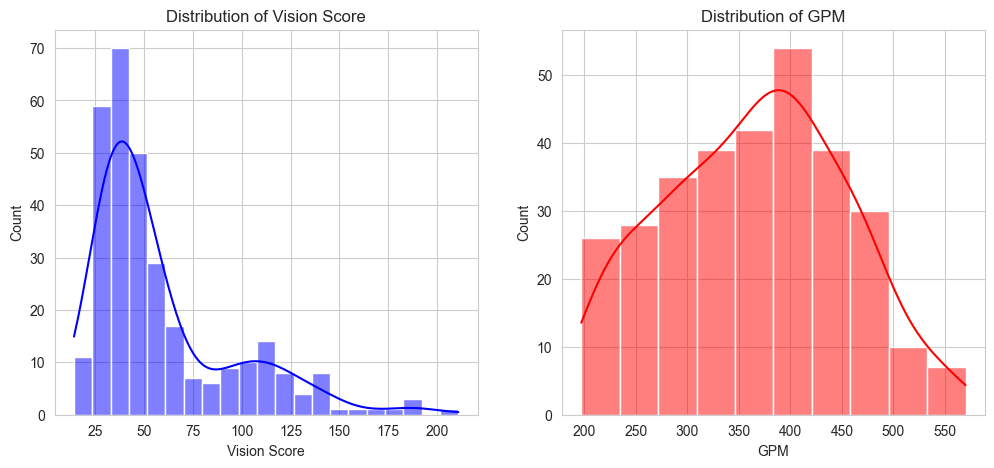

Shapiro-Wilk Test for Vision Score: p-value = 0.00000
Shapiro-Wilk Test for GPM: p-value = 0.00131


In [36]:
from scipy.stats import shapiro

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x, kde=True, color='blue')
plt.title('Distribution of Vision Score')

plt.subplot(1, 2, 2)
sns.histplot(y, kde=True, color='red')
plt.title('Distribution of GPM')
plt.show()

# lets use Shapiro-Wilk test for normality
shapiro_x = shapiro(x)
shapiro_y = shapiro(y)

print(f"Shapiro-Wilk Test for Vision Score: p-value = {shapiro_x.pvalue:.5f}")
print(f"Shapiro-Wilk Test for GPM: p-value = {shapiro_y.pvalue:.5f}")

Both p-value are significantly less than 0.05, which means that neither VS nor GPM data are normally distributed.


Thus, using Pearson's correlation might not be appropriate for this one. Instead, we will proceed using Spearman correlation.

##### 3.3.3.3 Checking for Outliers


Using z-scores

In [37]:
from scipy.stats import zscore

# z-scores
z_scores_x = np.abs(zscore(x))
z_scores_y = np.abs(zscore(y))

# outliers
outliers_x = np.where(z_scores_x > 3)
outliers_y = np.where(z_scores_y > 3)

print(f"Number of outliers in Vision Score: {len(outliers_x[0])}")
print(f"Number of outliers in GPM: {len(outliers_y[0])}")

Number of outliers in Vision Score: 5
Number of outliers in GPM: 0


Notice the [z_socre > 3], the 3 is threshold here.


And why the threshold is 3?


Empirical Rule(68-95-99.7 rule):


68% of the data falls within 1 standard deviation of the mean
95% of the data falls within 2 standard deviations of the mean
99.7% of the data falls within 3 standard deviations of the mean


A z-score greater than 3 or less than -3 (absolute value > 3) is extremely rare in a normal distribution (occurs in about 0.3% of the data).


Therefore, any data point with a z-score greater than 3 or less than -3 is considered an outlier.

##### 3.3.3.4 Choosing a Non-parametric Test


Since Spearman's corr is more resistant to outliers, I will use non-parametric test instead of Person.

In [38]:
# running Spearman's test

corr_coef, p_val = spearmanr(x, y)
print(f"Spearman Correlation Coefficient: {corr_coef:.5f}")
print(f"P-value: {p_val:.5f}")

Spearman Correlation Coefficient: -0.47386
P-value: 0.00000


Results: 


Spearman Correlation Coefficient: -0.47386--> indicates a moderate negative monotonic relationship between VS and GPM. In this case, as the VS increases, the GPM tends to decrease, but the relationship is not necessarily linear, it only follows a general trend where higher VS correspond to lower GPM.


P-value: 0.00000 --> which is highly statistically significant. This means that the probabiliyu of observing such a correlation by random chance is almost 0. Therefore, we can confidently conclude that there is a significant monotonic relationship between VS and GPM.


Conclusion: There is a statistically significant moderate negative monotonic relationship between VS and GPM. As VS increases, GPM tends to decrease, and this relationship is not due to random chance.

### 3.4 CC(Crowd Control) and Vision


Total Time CC Dealt vs Time CCing Others


Total Time CC Dealt: the sum of all stuns applied to each enemy

In [39]:
df_lol[["Player", "Total Time CC Dealt", "Time ccing others"]].head()

,Player,Total Time CC Dealt,Time ccing others
0,kingen,284,10
1,Lucid,194,24
2,ShowMaker,967,12
3,Aiming,340,10
4,Moham,38,20


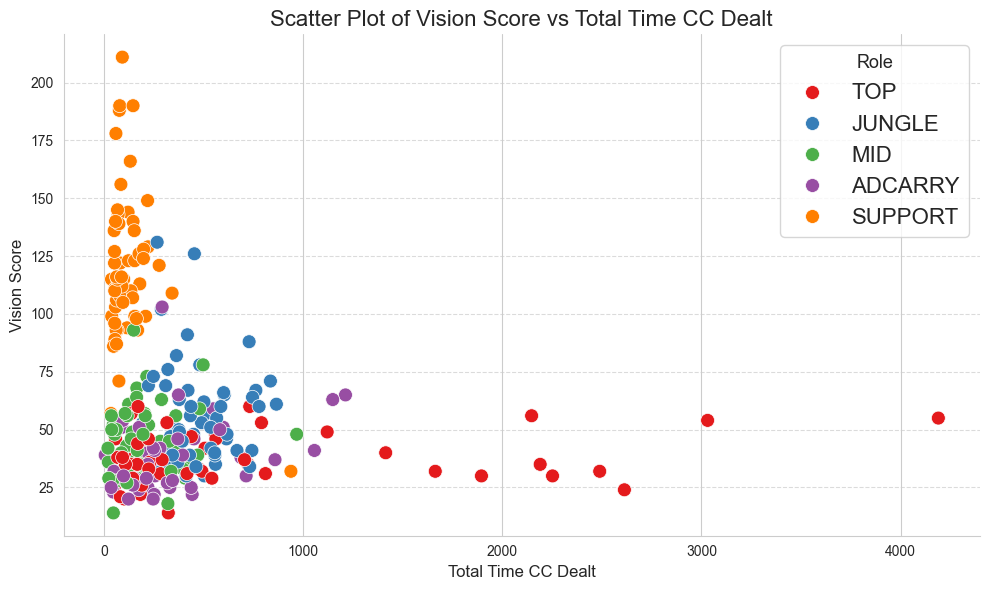

In [40]:
# Total Time CC Dealt
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_lol["Total Time CC Dealt"], y=df_lol["Vision Score"], hue=df_lol["Role"], palette='Set1', s=100, edgecolor='w', linewidth=0.5)
plt.title("Scatter Plot of Vision Score vs Total Time CC Dealt", fontsize=16)
plt.xlabel("Total Time CC Dealt", fontsize=12)
plt.ylabel("Vision Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.legend(title='Role', title_fontsize='13', fontsize='16', loc='upper right')
plt.tight_layout()
plt.show()

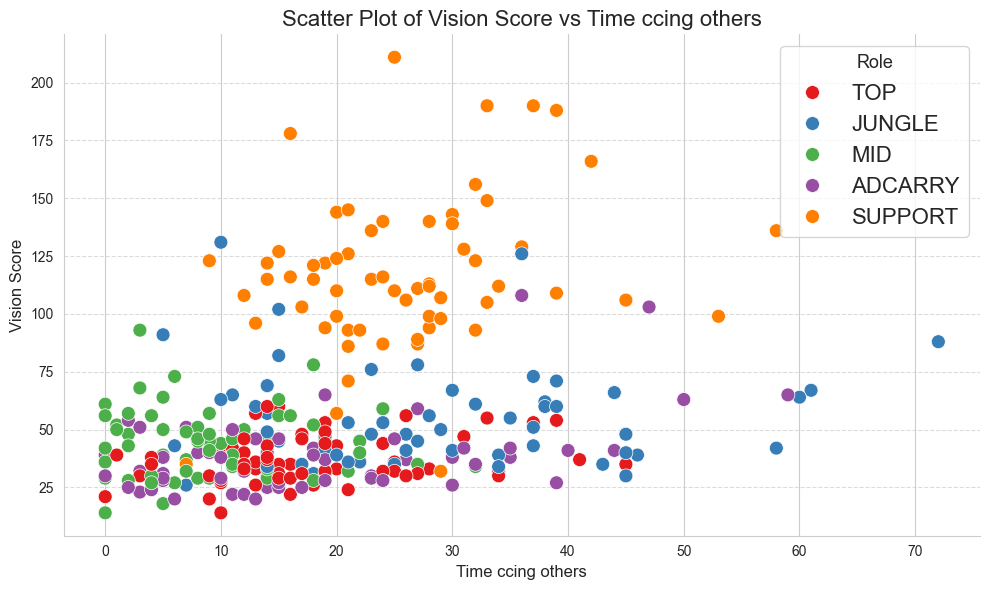

In [41]:
# Time CCing Others
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_lol["Time ccing others"], y=df_lol["Vision Score"], hue=df_lol["Role"], palette='Set1', s=100, edgecolor='w', linewidth=0.5)
plt.title("Scatter Plot of Vision Score vs Time ccing others", fontsize=16)
plt.xlabel("Time ccing others", fontsize=12)
plt.ylabel("Vision Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.legend(title='Role', title_fontsize='13', fontsize='16', loc='upper right')
plt.tight_layout()
plt.show()

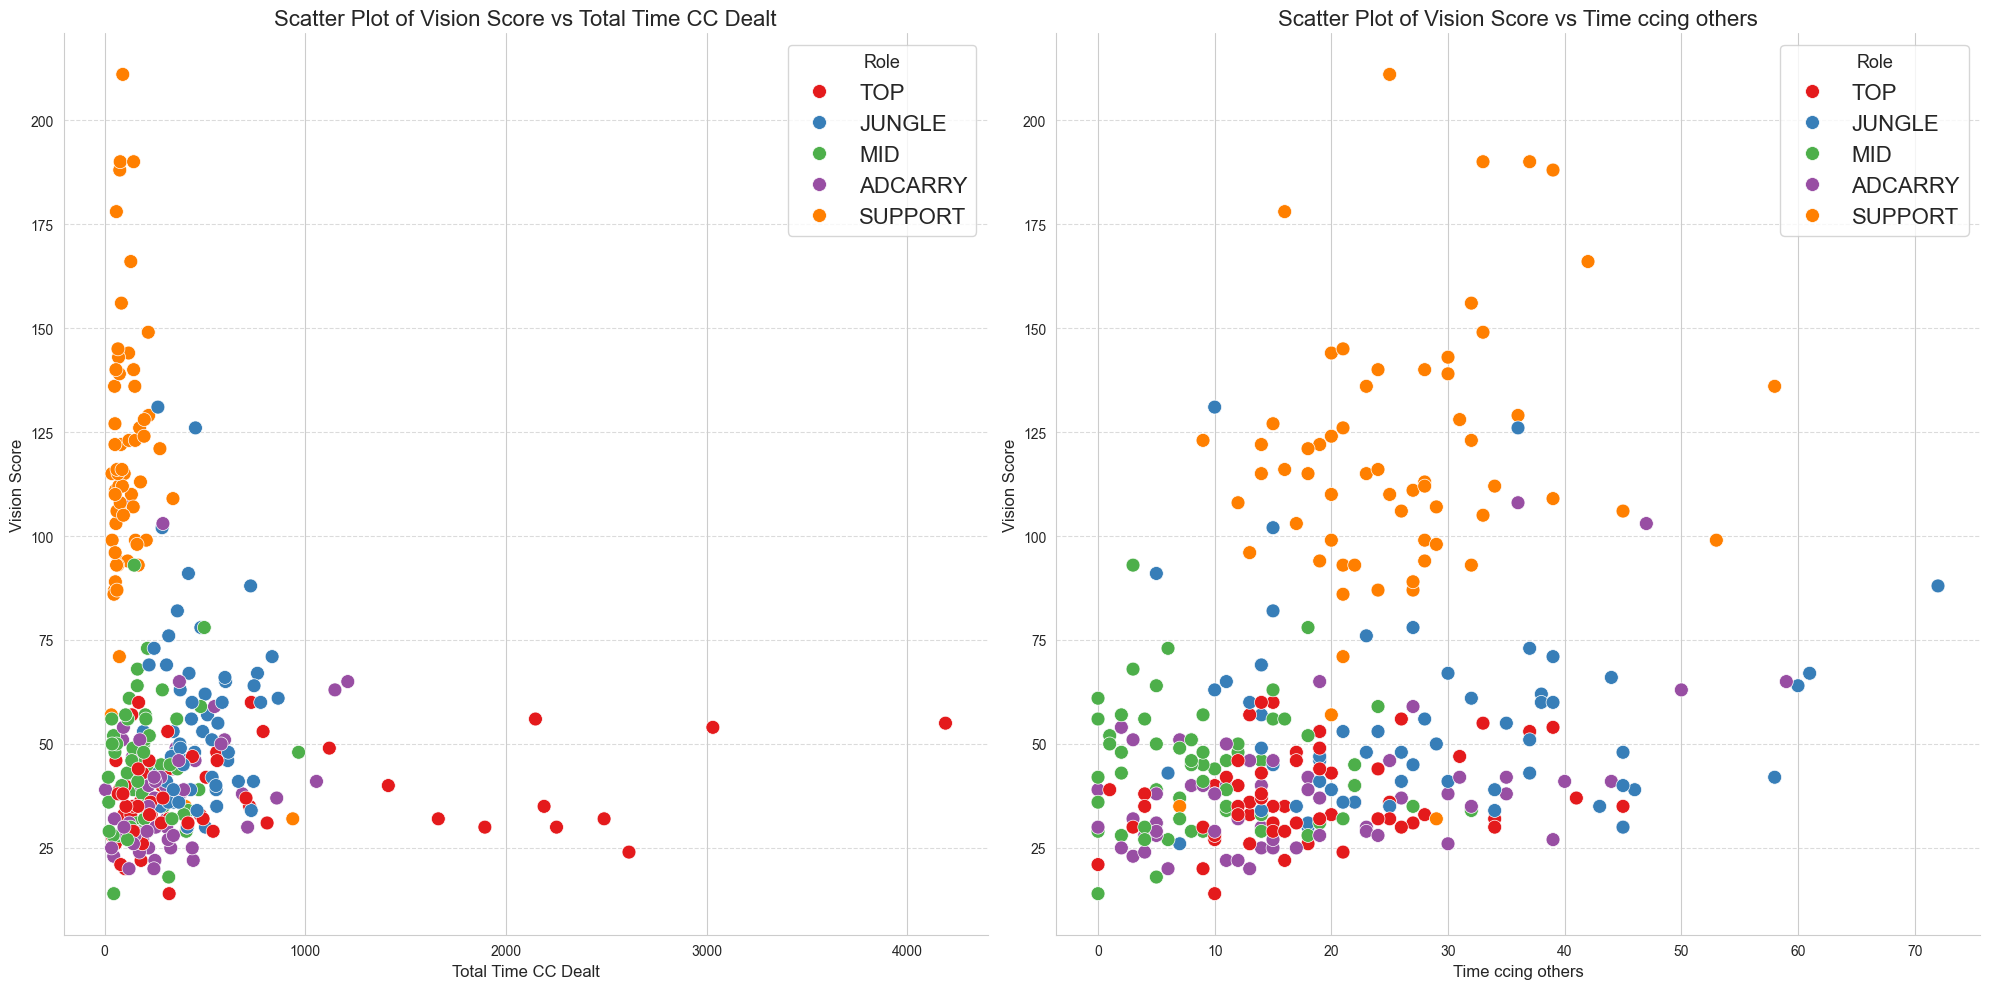

In [42]:
# Place them side to side to spot the differences
plt.figure(figsize=(20, 10))

# Plot 1
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_lol["Total Time CC Dealt"], y=df_lol["Vision Score"], hue=df_lol["Role"], palette='Set1', s=100, edgecolor='w', linewidth=0.5)

plt.title("Scatter Plot of Vision Score vs Total Time CC Dealt", fontsize=16)
plt.xlabel("Total Time CC Dealt", fontsize=12)
plt.ylabel("Vision Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()
plt.legend(title='Role', title_fontsize='13', fontsize='16', loc='upper right')

# Plot 2
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_lol["Time ccing others"], y=df_lol["Vision Score"], hue=df_lol["Role"], palette='Set1', s=100, edgecolor='w', linewidth=0.5)

plt.title("Scatter Plot of Vision Score vs Time ccing others", fontsize=16)
plt.xlabel("Time ccing others", fontsize=12)
plt.ylabel("Vision Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()
plt.legend(title='Role', title_fontsize='13', fontsize='16', loc='upper right')

plt.tight_layout()
plt.show()

Results:


As for the 'VS vs Total Time CC Dealt', it seems that the higher the VS of a player, the less chances he/her will have a higher cc score. Supports have high VS but very low CC time on enemies, while the reverse appear to be true for Jungles, lower mid VS yet higher time inflincting cc time dealt.


While on the 'VS vs Time CCing others', it seems that there is more equal distribution of roles across these two variables. Indicating that Supports spend an average time more time using CC spells on enemies which, result in fewer total CC time overall. While virtually all other roles(Mid carries to a lesser degree) spend a less various times using their spell skills, resulting in about the same overall CC time dealt.


The actual ROLE of the player actually determines how frerquently they will use more CC spells, the VS is just another variable, not the defining one.

### 3.5 KDA

In [43]:
perfect_kda_players = df_lol[df_lol["KDA"] == "Perfect_KDA"]
perf_kda_group = perfect_kda_players.groupby("Player").size().reset_index(name="Perfect KDA Players").sort_values(by="Perfect KDA Players", ascending=False)

In [44]:
print(f"\nTotal games with Perfect_KDA: {len(df_lol[df_lol['KDA'] == 'Perfect_KDA'])}")
print(f"\nTotal players with Perfect KDA: {len(perf_kda_group)}\n")
perf_kda_group


Total games with Perfect_KDA: 37

Total players with Perfect KDA: 13



,Player,Perfect KDA Players
12,Zeka,6
9,Peyz,6
11,Viper,5
5,Gumayusi,3
0,Aiming,3
10,ShowMaker,3
8,Peanut,2
6,Keria,2
3,Doran,2
7,Lucid,2


Results: KDA = ( Kills + Assists ) / Deaths


If player never died, then the fraction itself is 'mathematically undefined'. Therefore, the [KDA] variable in our df contains counterintuitive string values for a primarily numeric(i.e. 'Perfect_KDA' is nit float or int)

In [45]:
df_lol["KDA"].dtype

dtype('O')

In [46]:
df_lol["KDA"].head(3)

0            1.8
1    Perfect_KDA
2              8
Name: KDA, dtype: object

As 'Perfect_KDA' means deniminator = 0
New fomula: KDA = (Kills + Assists) / (Deaths + 1)

In [47]:
df_original = df_lol.copy()
df_original.rename(columns={"KDA":"Orig_KDA"}, inplace=True)
df_original[["Player", "Orig_KDA"]].head()

,Player,Orig_KDA
0,kingen,1.8
1,Lucid,Perfect_KDA
2,ShowMaker,8
3,Aiming,Perfect_KDA
4,Moham,5


#### 3.5.1 Standard way


Already have the 'Kill' and 'Assists' for each player

In [48]:
condition = df_lol["KDA"] == "Perfect_KDA"
df_lol.loc[condition, "KDA"] = df_lol.loc[condition, "Kills"] + df_lol.loc[condition, "Assists"]
df_lol[["Player", "Team", "KDA"]].head()

,Player,Team,KDA
0,kingen,DK,1.8
1,Lucid,DK,10
2,ShowMaker,DK,8
3,Aiming,DK,9
4,Moham,DK,5


#### 3.5.2 More Complex Way


For the datasets that just have KDA stats with Perfect_KDA but without Kill/Assist stats. 


1. Find the player with Perfect KDA
2. Find the remaining 4 members of their team
3. Use the other 4 members' Kill and Assist stats to perform an imputation
4. Develop an average metric of the remaining team to impute the Perfect_KDA
5. Ideally, there should be an additional boost to the end result.

In [49]:
# Just a new testing df called df_lol2, so as not to interfere with our main one
df_lol2 = df_original.copy()
df_lol2.rename(columns={"Orig_KDA":"AVG_KDA"}, inplace=True)

In [50]:
# 1. Find all rows where KDA is "Perfect_KDA" or NaN (after converting to numeric)
df_lol2['AVG_KDA'] = pd.to_numeric(df_lol2['AVG_KDA'], errors='coerce')
perf_nan_index = df_lol2[df_lol2['AVG_KDA'].isna()].index

# 2. Loop over the rows with missing KDA values
for i in perf_nan_index:
    # Extract game-related info for that player
    team = df_lol2.loc[i, 'Team']
    game = df_lol2.loc[i, 'No Game']
    day = df_lol2.loc[i, 'Day']
    side = df_lol2.loc[i, 'Side']
    
# 3. Filter the DataFrame to find teammates in the same game
    teammates_df = df_lol2[
        (df_lol2['Team'] == team) &
        (df_lol2['No Game'] == game) &
        (df_lol2['Day'] == day) &
        (df_lol2['Side'] == side) &
        (df_lol2.index != i)  # Exclude the player with missing KDA
    ]
    
# 4. Then calculate the average KDA for teammates (excluding missing NaN values that we introduced)
    avg_kda = teammates_df['AVG_KDA'].mean()

# 5. Update the missing KDA with the average KDA of the teammates
    df_lol2.loc[i, 'AVG_KDA'] = avg_kda

# 6. Add a further boost to the final stat
df_lol2['AVG_KDA'] = df_lol2['AVG_KDA']*1.33
    
df_lol2["AVG_KDA"] = df_lol2["AVG_KDA"].round(1)

In [51]:
df_lol2[["Player","AVG_KDA"]].head()

,Player,AVG_KDA
0,kingen,2.4
1,Lucid,6.6
2,ShowMaker,10.6
3,Aiming,6.6
4,Moham,6.6


In [52]:
# Compare them side to side

In [53]:
combined_df = pd.concat([df_lol2, df_lol, df_original], axis=1)

In [54]:
test_df = pd.concat([df_original[["Player","Orig_KDA"]],df_lol2["AVG_KDA"], df_lol["KDA"]], axis=1)

In [55]:
test_df[test_df["Orig_KDA"] == "Perfect_KDA"].head(10)

,Player,Orig_KDA,AVG_KDA,KDA
1,Lucid,Perfect_KDA,6.6,10
3,Aiming,Perfect_KDA,6.6,9
31,Lucid,Perfect_KDA,13.6,13
32,ShowMaker,Perfect_KDA,13.6,9
33,Aiming,Perfect_KDA,13.6,15
52,Bdd,Perfect_KDA,6.9,13
63,Gumayusi,Perfect_KDA,7.6,3
83,Peyz,Perfect_KDA,8.1,11
87,ShowMaker,Perfect_KDA,2.3,6
98,Peyz,Perfect_KDA,8.3,15


Ideally, the Perfect_KDA will usually have a higher KDA ratio than the average of their team. Even with the added +33%, the end result still needs added bossting(perform dynamically).

### 3.6 Multiple Regression

In [62]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_lol['Role_encoded'] = label_encoder.fit_transform(df_lol['Role'])

X = df_lol[['Role_encoded', 'Kills', 'Deaths', 'Assists', 'KDA', 'Golds', 'CS', 'GPM', 'Dragon Team', 'Baron Team', 'Total damage to Champion', 'Vision Score', 'VSPM', 'Total damage to Champion', 'True Damage', 'KP%', 'Penta kills', 'Damage dealt to turrets', 'Time ccing others', 'Total Time Spent Dead']]
y = df_lol['Total Time CC Dealt']

# we will store variable/feature names for later
feature_names = X.columns.tolist()

# Ssandardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# constant for the intercept
X_scaled = sm.add_constant(X_scaled)

# using the feature names to include the constant
feature_names = ['const'] + feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model fit
model = sm.OLS(y_train, X_train).fit()

# df as the model summary (since the standard summary() does not provide feature/variable names)
summary_df = pd.DataFrame({
    'Feature': feature_names,
    'P>|t|': model.pvalues,
    'Coefficient': model.params,
    'Std Err': model.bse,
    't': model.tvalues,
    '95% Conf. Int. Lower': model.conf_int()[0],
    '95% Conf. Int. Upper': model.conf_int()[1]
})

print("Goodness of Fit stats:")
print(f"R Squared: {model.rsquared.round(3)}")
print(f"Adjusted R Squared: {model.rsquared_adj.round(3)}\n")
print(summary_df)

Goodness of Fit stats:
R Squared: 0.372
Adjusted R Squared: 0.319

                        Feature         P>|t|  Coefficient     Std Err  \
const                     const  1.565557e-31   357.253970   26.098380   
x1                 Role_encoded  1.933495e-06   158.488014   32.433223   
x2                        Kills  6.104191e-01    38.477512   75.419534   
x3                       Deaths  8.353408e-01   -14.596408   70.143086   
x4                      Assists  2.400287e-01   -63.040231   53.515082   
x5                          KDA  8.679940e-01    10.324751   62.049841   
x6                        Golds  2.636426e-01  -179.601728  160.274653   
x7                           CS  2.471281e-02   392.938113  173.801712   
x8                          GPM  1.491757e-01  -155.913003  107.723951   
x9                  Dragon Team  1.607033e-02    94.937570   39.143400   
x10                  Baron Team  2.563260e-01    45.309451   39.815914   
x11    Total damage to Champion  3.118407e-01

Results: 


R Squared: 0.372 --> indicates 37.2% of the variance of Total Time CC Dealt


Significant variables: Role_encoded, CS, Dragon Team, Time ccing others, etc. have a greater impact on the target variable.


Insignificant variables: Kills, Deaths, etc., have a high P value, indicating that they have a small impact on the target variable. You can consider removing these features to simplify the model.

I try to optimizing the model in 'OLS - Total Time CC Dealt.ipynb'.

## 4. Visualizing The Vision

### 4.1 Histogram of Vision Score

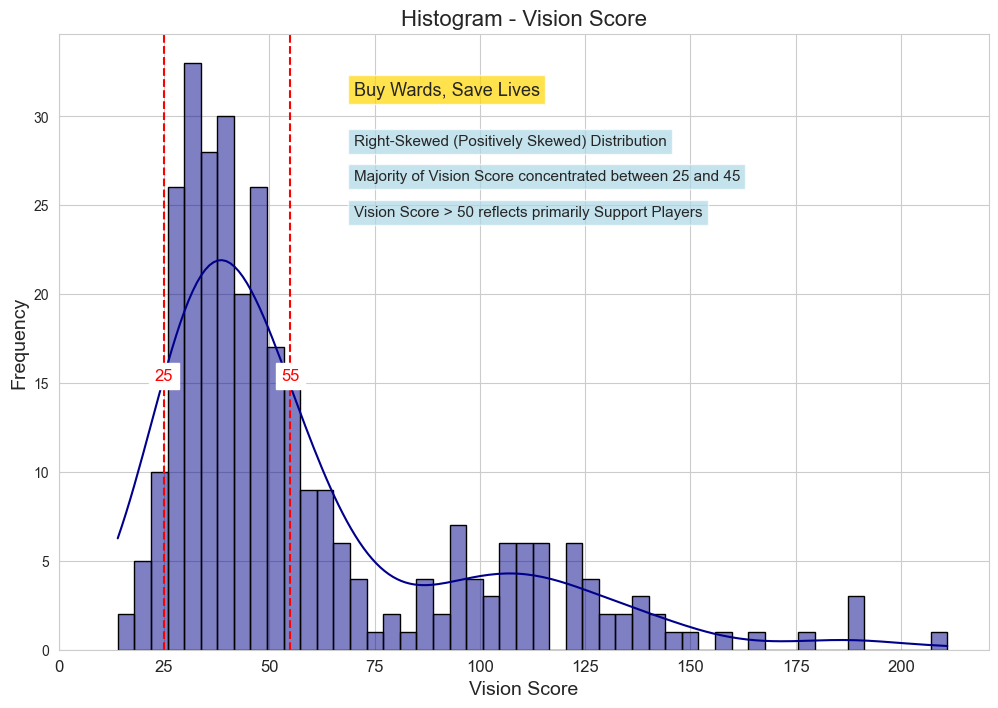

In [334]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.histplot(df_lol["Vision Score"], kde=True, color="darkblue", bins=50, edgecolor='black')
plt.title("Histogram - Vision Score", fontsize=16)
plt.xlabel("Vision Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.axvline(x=55, linestyle="--", color="red", lw=1.5)
plt.axvline(x=25, linestyle="--", color="red", lw=1.5)
plt.text(55, 15, '55', color='red', fontsize=12, ha='center', va='bottom', backgroundcolor='white')
plt.text(25, 15, '25', color='red', fontsize=12, ha='center', va='bottom', backgroundcolor='white')

plt.xticks(np.arange(0, df_lol["Vision Score"].max(), 25), fontsize=12)

text1 = "Buy Wards, Save Lives"
text2 = "Right-Skewed (Positively Skewed) Distribution"
text3 = "Majority of Vision Score concentrated between 25 and 45"
text4 = "Vision Score > 50 reflects primarily Support Players"

plt.text(70, 32, text1, fontsize=13, verticalalignment='top', bbox={'facecolor': 'gold', 'alpha': 0.7})
plt.text(70, 29, text2, fontsize=11, verticalalignment='top', bbox={'facecolor': 'lightblue', 'alpha': 0.7})
plt.text(70, 27, text3, fontsize=11, verticalalignment='top', bbox={'facecolor': 'lightblue', 'alpha': 0.7})
plt.text(70, 25, text4, fontsize=11, verticalalignment='top', bbox={'facecolor': 'lightblue', 'alpha': 0.7})

plt.show()

### 4.2 Standard Box Plot of Vision Score

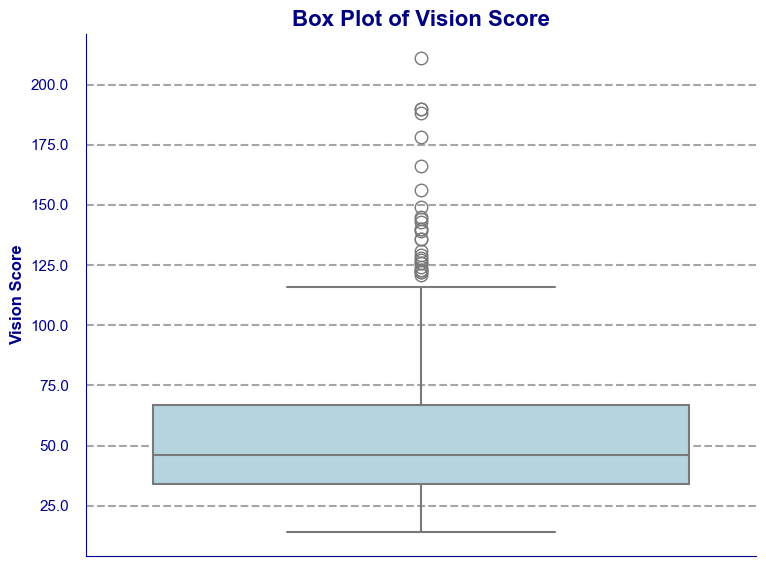

In [335]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=df_lol["Vision Score"], color='lightblue', linewidth=1.5)

plt.title("Box Plot of Vision Score", fontsize=16, fontweight='bold', color='navy')
plt.ylabel("Vision Score", fontsize=12, fontweight='bold', color='darkblue')

ax.set_yticklabels(ax.get_yticks(), fontsize=11, color='darkblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['left'].set_color('darkblue')
ax.spines['bottom'].set_color('darkblue')

plt.grid(axis='y', linestyle='--', color='grey', alpha=0.7)

plt.tight_layout()
plt.show()

### 4.3 Standard Violin Plot of Vision Score

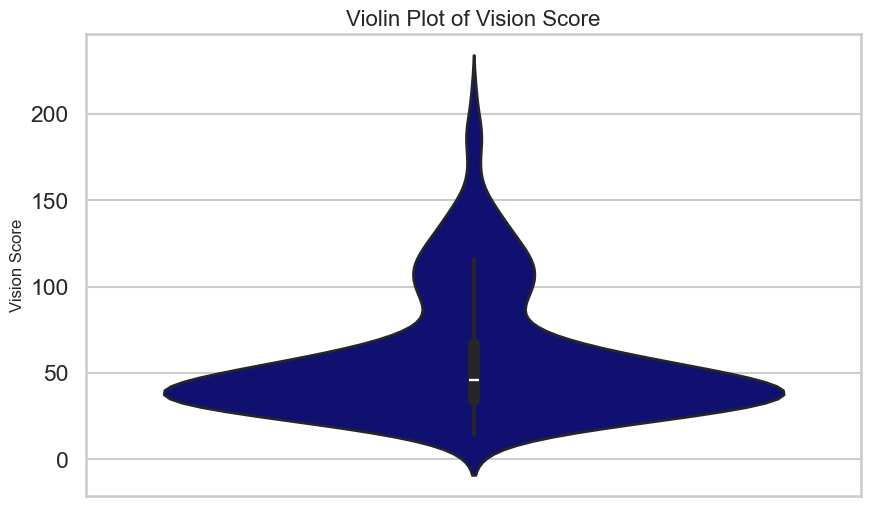

In [336]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=df_lol["Vision Score"], color='navy')
plt.title("Violin Plot of Vision Score", fontsize=16)
plt.ylabel("Vision Score", fontsize=12)
plt.show()

### 4.4 Summary

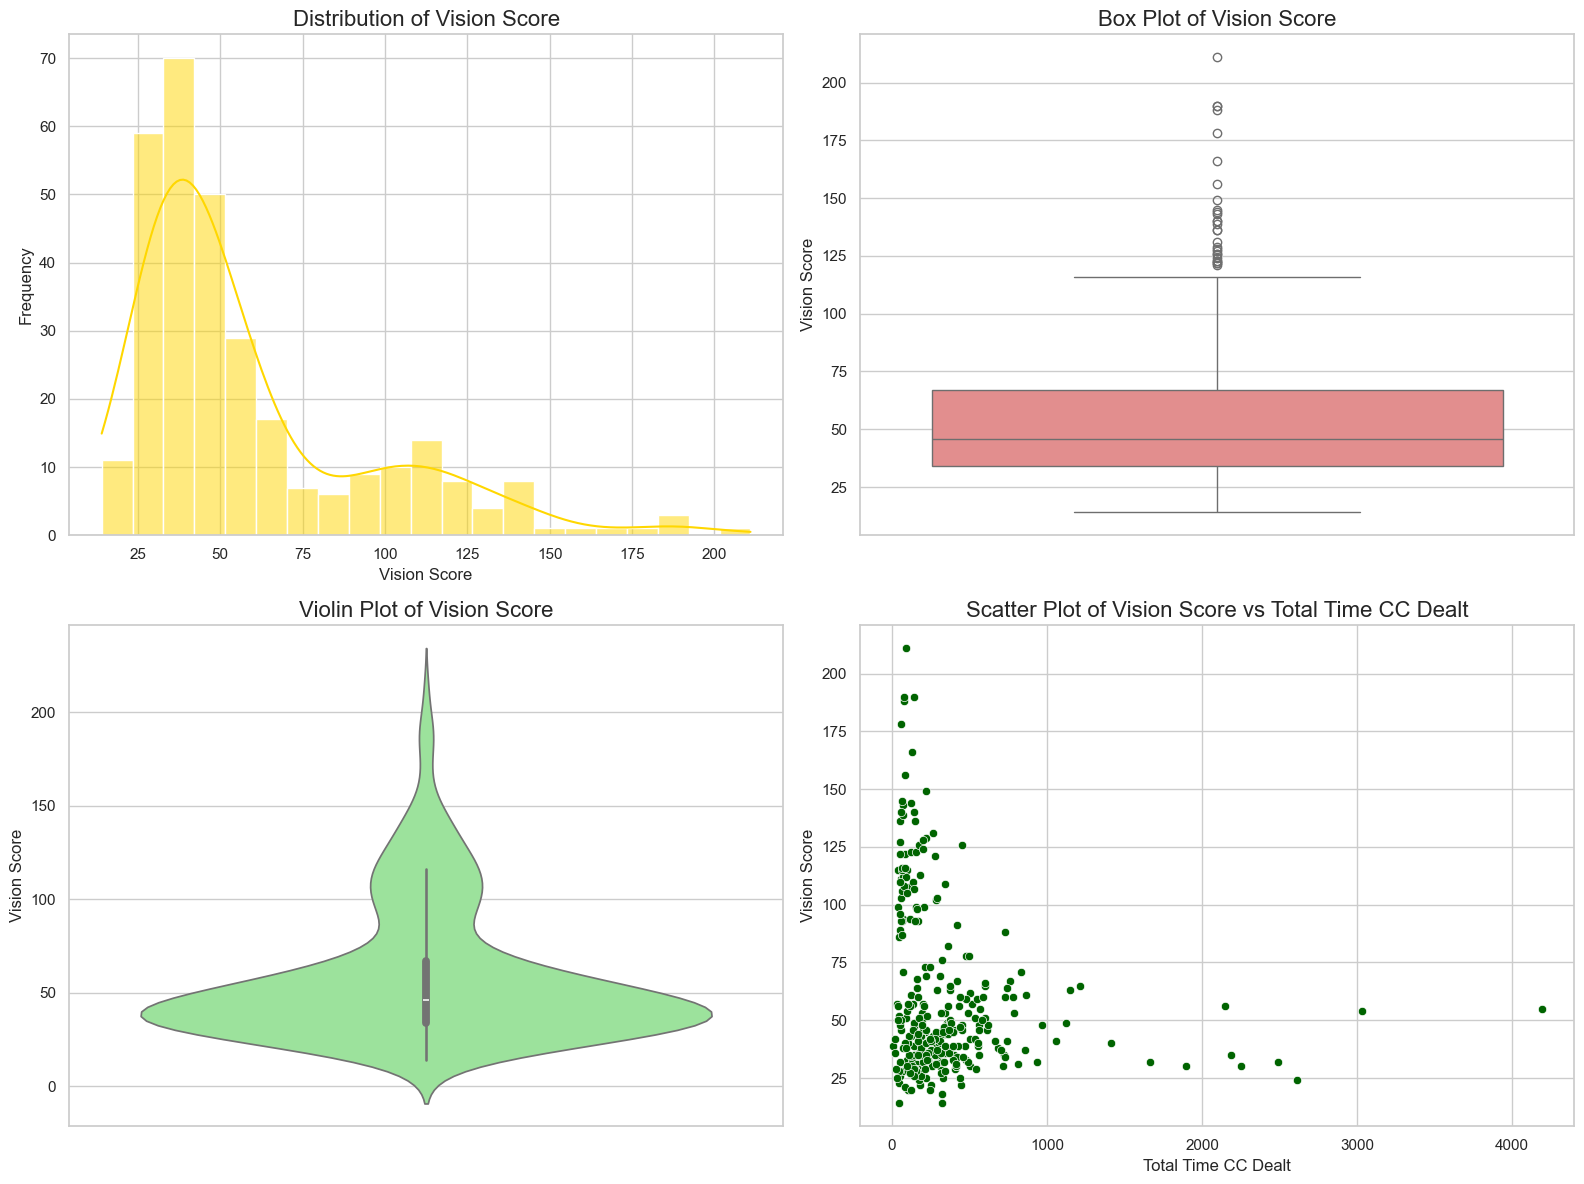

In [337]:
# Summary
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(df_lol["Vision Score"], kde=True, color='Gold', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Vision Score", fontsize=16)
axes[0, 0].set_xlabel("Vision Score", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=12)

sns.boxplot(y=df_lol["Vision Score"], color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of Vision Score", fontsize=16)
axes[0, 1].set_ylabel("Vision Score", fontsize=12)

sns.violinplot(y=df_lol["Vision Score"], color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title("Violin Plot of Vision Score", fontsize=16)
axes[1, 0].set_ylabel("Vision Score", fontsize=12)

sns.scatterplot(x=df_lol["Total Time CC Dealt"], y=df_lol["Vision Score"], color='darkgreen', ax=axes[1, 1])
axes[1, 1].set_title("Scatter Plot of Vision Score vs Total Time CC Dealt", fontsize=16)
axes[1, 1].set_xlabel("Total Time CC Dealt", fontsize=12)
axes[1, 1].set_ylabel("Vision Score", fontsize=12)

plt.tight_layout()
plt.show()

### 4.5 Supports FTW - Correlation Heatmap - Wards & Vision

<Axes: >

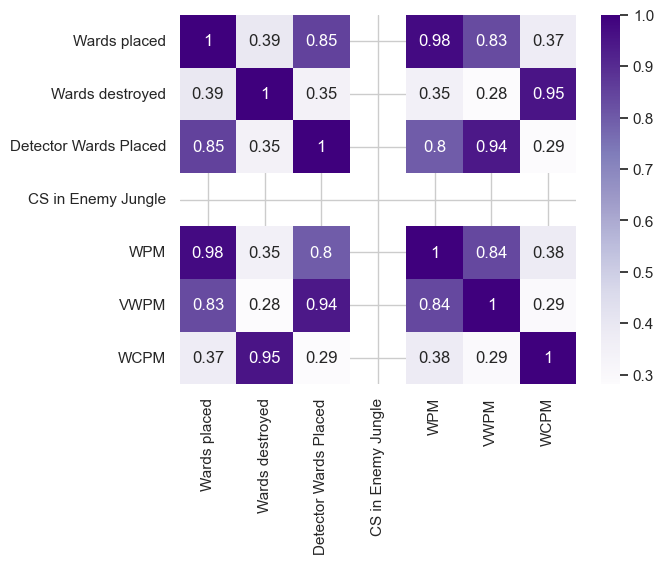

In [338]:
df_v = df_lol[["Wards placed", "Wards destroyed", "Detector Wards Placed", "CS in Enemy Jungle", "WPM", "VWPM", "WCPM"]]
sns.heatmap(df_v.corr(),annot=True, cmap='Purples')

### 4.6 Vision Wards Placed vs Wards Destroyed


A Scatter Plot of Wards Placed vs Wards Destroyed

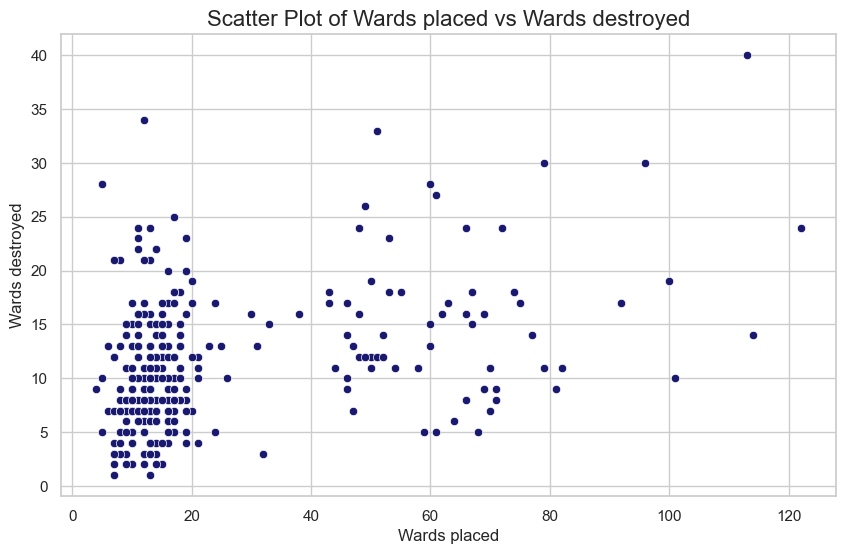

In [339]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_lol["Wards placed"], y=df_lol["Wards destroyed"], color='midnightblue')
plt.title("Scatter Plot of Wards placed vs Wards destroyed", fontsize=16)
plt.xlabel("Wards placed", fontsize=12)
plt.ylabel("Wards destroyed", fontsize=12)
plt.show()

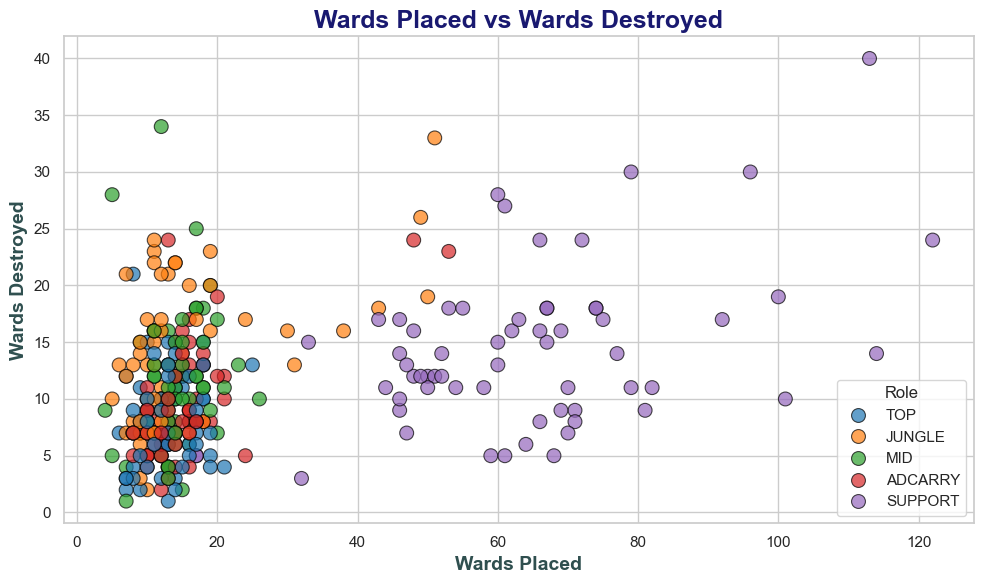

In [340]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.scatterplot(
    x=df_lol["Wards placed"], 
    y=df_lol["Wards destroyed"], 
    hue=df_lol["Role"], 
    palette='tab10',  
    s=100,  
    edgecolor='black',  
    alpha=0.7  
)

plt.title("Wards Placed vs Wards Destroyed", fontsize=18, fontweight='bold', color='midnightblue')
plt.xlabel("Wards Placed", fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel("Wards Destroyed", fontsize=14, fontweight='bold', color='darkslategray')

plt.tight_layout()
plt.show()

## 5. Data Aggregation

### 5.1 New DataFrame: Top Crowd Controlled Players

In [341]:
# coding the outcomes for win/loss
df_lol["Outcome_Num_Win"] = df_lol["Outcome"].map({"Win": 1, "Loss": 0})
df_lol["Outcome_Num_Loss"] = df_lol["Outcome"].map({"Win": 0, "Loss": 1})

# groupby df, I will rename those to make more sense and save space later
gb_lol = df_lol.groupby("Player").agg({
    "Outcome_Num_Win": "sum",
    "Outcome_Num_Loss": "sum",
    "Total Time CC Dealt": "sum",
    "Vision Score": "sum",
    "GPM": "mean",
    "Wards placed": "sum",
    "Control Wards Purchased": "sum",
    "Wards destroyed": "sum"
})

gb_lol["GPM"] = gb_lol["GPM"].round(1)

# calculate additional metrics
gb_lol["Wards Score"] = ((gb_lol["Control Wards Purchased"] + gb_lol["Wards placed"] + gb_lol["Wards destroyed"]) / 3).round(1)
gb_lol["Total Matches"] = df_lol.groupby('Player').size()
gb_lol["Win %Perc"] = (gb_lol["Outcome_Num_Win"] / gb_lol["Total Matches"]).round(1)
gb_lol["Vision Versus LCK Avg"] = (gb_lol["Vision Score"] / gb_lol["Total Matches"]).round(1)
gb_lol["Wards Versus LCK Avg"] = ((gb_lol["Wards placed"] + gb_lol["Control Wards Purchased"] + gb_lol["Wards destroyed"]) / gb_lol["Total Matches"]).round(1)
gb_lol["CC Versus LCK Avg"] = (gb_lol["Total Time CC Dealt"] / gb_lol["Total Matches"]).round(1)

# renaming
gb_lol = gb_lol.rename(columns={
    "Outcome_Num_Win": "Wins",
    "Outcome_Num_Loss": "Losses",
})

# droping specific columns and rearraging the existing ones
gb_lol.drop(["Control Wards Purchased", "Wards placed", "Wards destroyed"], axis=1, inplace=True)
# Define the desired column order
new_order = ["Wins", "Losses", "Win %Perc", "Total Time CC Dealt", 
             "CC Versus LCK Avg", "GPM", "Vision Score", 
             "Vision Versus LCK Avg", "Wards Score", "Wards Versus LCK Avg"]

gb_lol = gb_lol[new_order]
gb_lol.sort_values(by="Total Time CC Dealt", ascending=False, inplace=True)

In [342]:
print("\n**Top 10 Players by Crowd Control Time Dealt - LCK 2024 Summer Playoffs**\n")
top_10_cc = gb_lol.iloc[0:10]
top_10_cc


**Top 10 Players by Crowd Control Time Dealt - LCK 2024 Summer Playoffs**



,Wins,Losses,Win %Perc,Total Time CC Dealt,CC Versus LCK Avg,GPM,Vision Score,Vision Versus LCK Avg,Wards Score,Wards Versus LCK Avg
Player,,,,,,,,,,
Kiin,8,4,0.7,18302,1525.2,369.9,483,40.2,115.7,28.9
Peanut,10,6,0.6,7444,465.2,341.9,891,55.7,205.7,38.6
Doran,10,6,0.6,7147,446.7,366.8,618,38.6,161.7,30.3
Canyon,8,4,0.7,7079,589.9,347.8,729,60.8,172.7,43.2
Zeus,7,8,0.5,6907,460.5,411.3,562,37.5,127.0,25.4
Oner,7,8,0.5,6028,401.9,334.1,796,53.1,174.7,34.9
Viper,10,6,0.6,5360,335.0,440.6,740,46.2,179.7,33.7
kingen,4,7,0.4,5135,466.8,370.4,362,32.9,83.0,22.6
Peyz,8,4,0.7,4504,375.3,470.6,451,37.6,121.0,30.2


### 5.2 Visualizations - New Correlation Heatmap

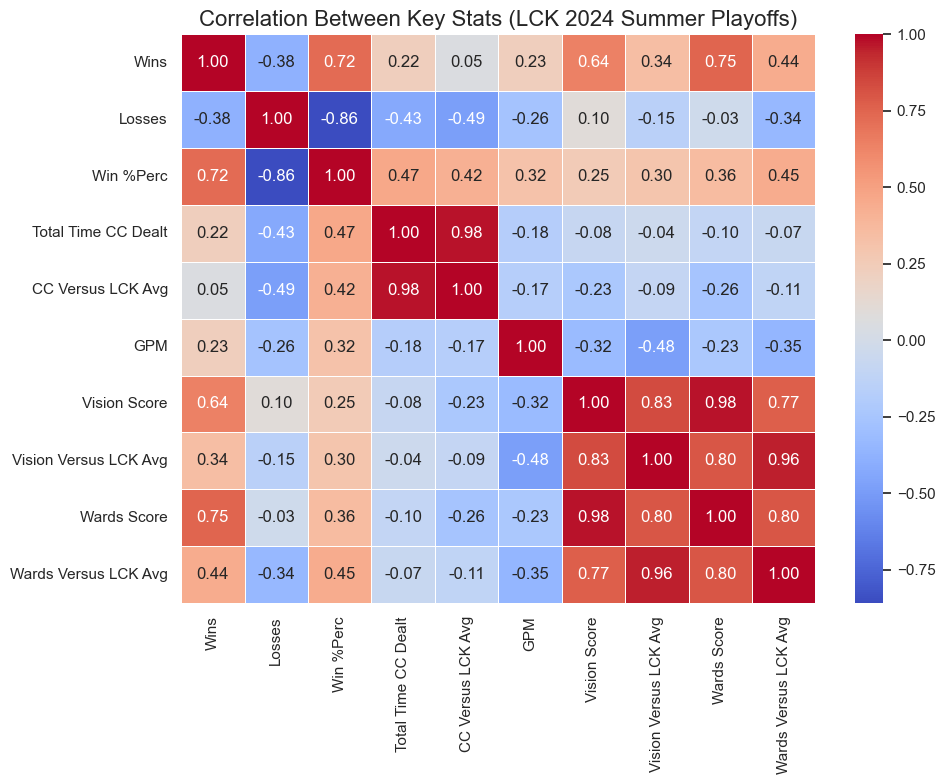

In [343]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    top_10_cc[['Wins', 'Losses', 'Win %Perc', 'Total Time CC Dealt', 'CC Versus LCK Avg', 'GPM', 
               'Vision Score', 'Vision Versus LCK Avg', 'Wards Score', 'Wards Versus LCK Avg']].corr(),
    annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f'
)
plt.title('Correlation Between Key Stats (LCK 2024 Summer Playoffs)', fontsize=16)
plt.tight_layout()
plt.show()

### 5.3 Visualizations - GPM

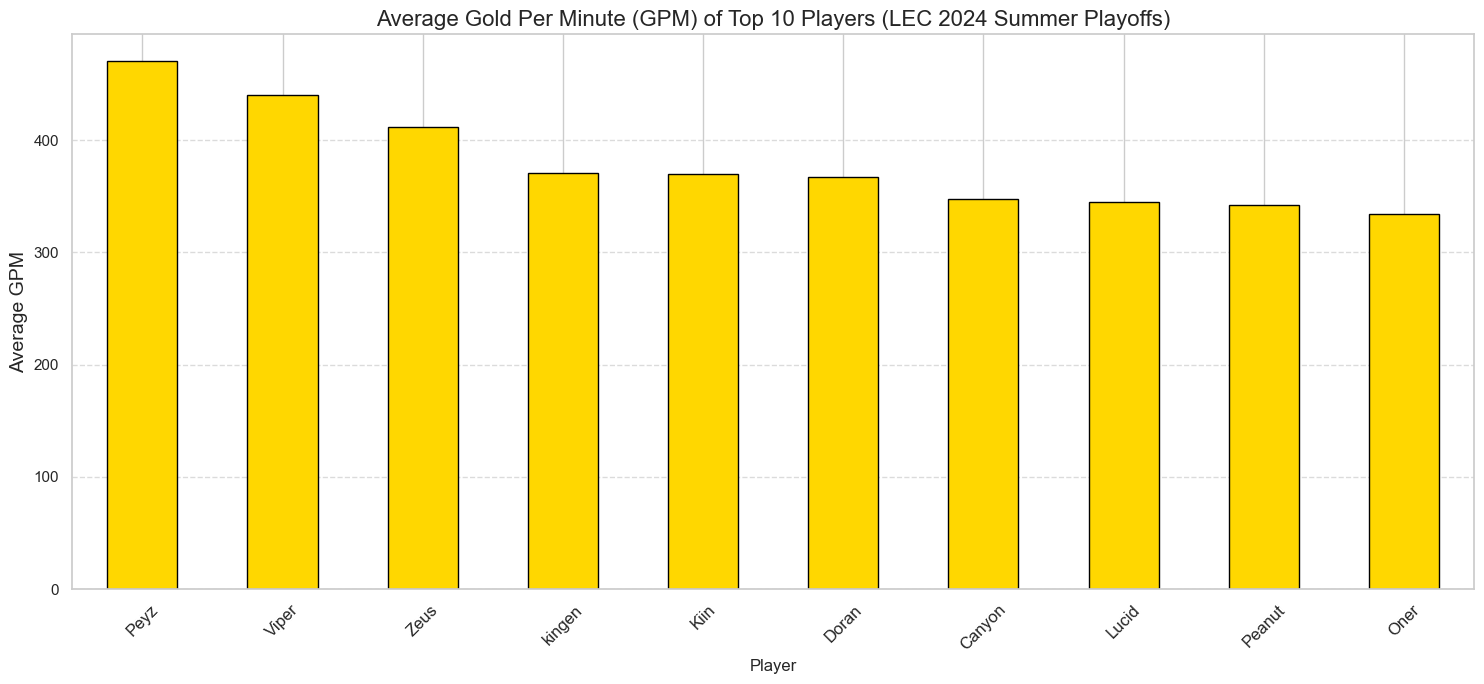

In [344]:
plt.figure(figsize=(15, 7))
top_10_cc_sorted_gpm = top_10_cc.sort_values(by='GPM', ascending=False)  # Sort by GPM for better clarity
top_10_cc_sorted_gpm['GPM'].plot(kind='bar', color='gold', edgecolor="black")
plt.title('Average Gold Per Minute (GPM) of Top 10 Players (LEC 2024 Summer Playoffs)', fontsize=16)
plt.ylabel('Average GPM', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5.4 Visualizations - Win %Percentage

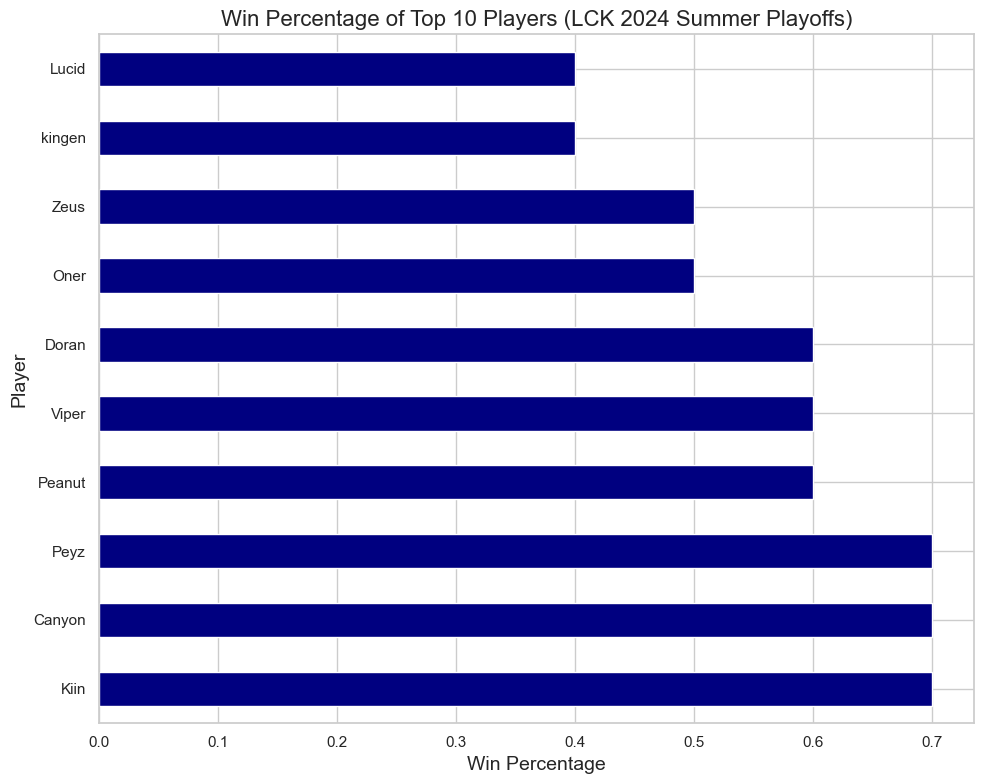

In [345]:
plt.figure(figsize=(10, 8))
top_10_cc['Win %Perc'].sort_values(ascending=False).plot(kind='barh', color='navy')
plt.title('Win Percentage of Top 10 Players (LCK 2024 Summer Playoffs)', fontsize=16)
plt.xlabel('Win Percentage', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.tight_layout()
plt.show()

### 5.5 Visualizations - Wins vs Loses Stacked Barplot

<Figure size 1500x1200 with 0 Axes>

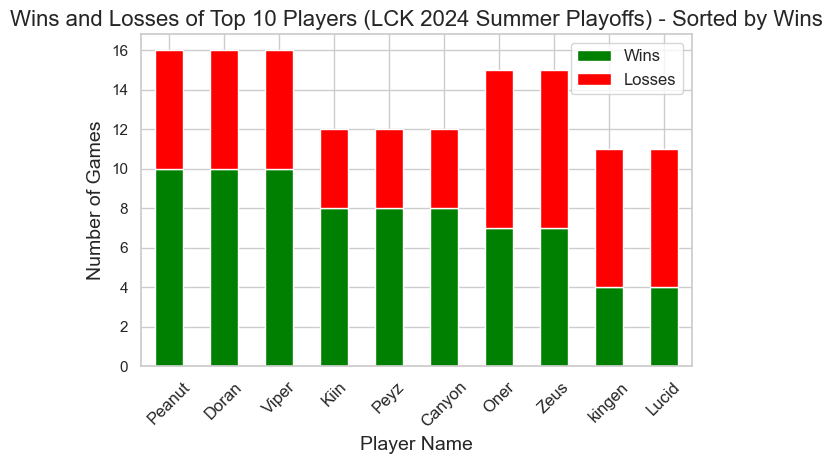

(Sorted by Total Wins)


In [346]:
plt.figure(figsize=(15, 12))
top_10_cc_sorted_wins = top_10_cc.sort_values(by='Wins', ascending=False)
top_10_cc_sorted_wins[['Wins', 'Losses']].plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Wins and Losses of Top 10 Players (LCK 2024 Summer Playoffs) - Sorted by Wins', fontsize=16)
plt.ylabel('Number of Games', fontsize=14)
plt.xlabel("Player Name", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()
print("(Sorted by Total Wins)")

### 5.6 Visualizations - Total Crowd Control Dealt

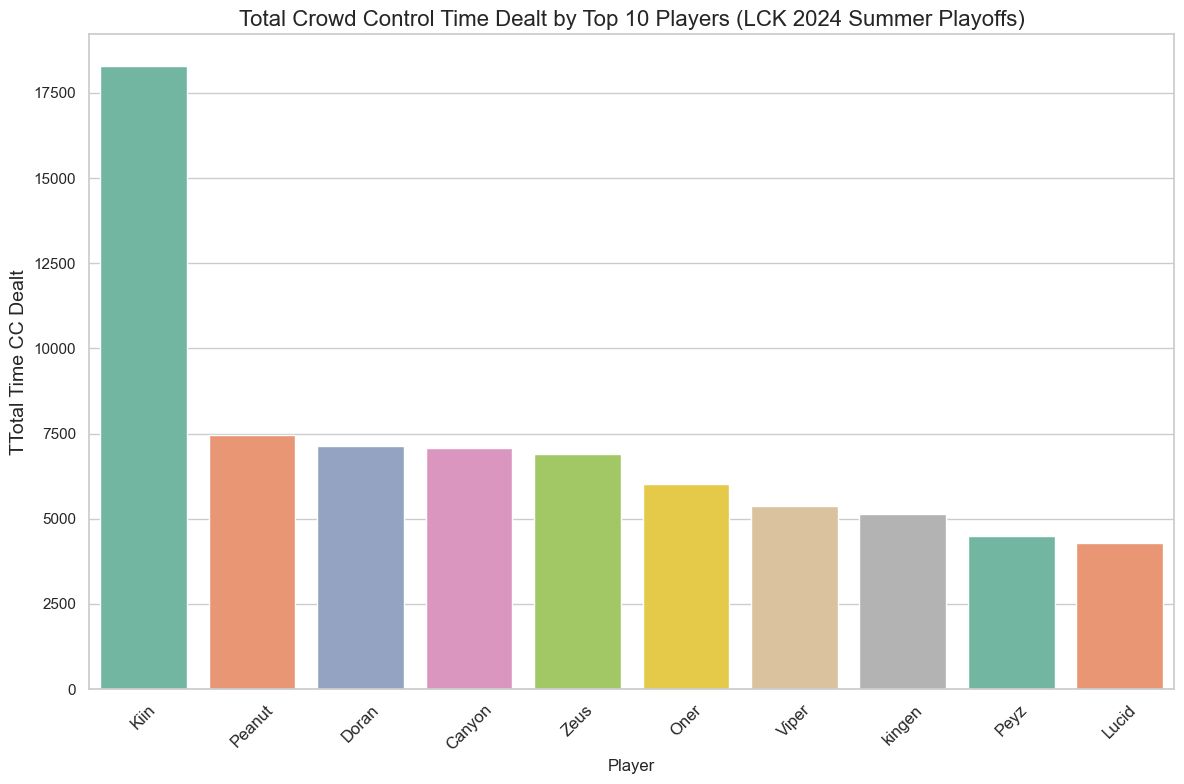

In [347]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cc.index, y=top_10_cc['Total Time CC Dealt'], palette='Set2')
plt.title('Total Crowd Control Time Dealt by Top 10 Players (LCK 2024 Summer Playoffs)', fontsize=16)
plt.ylabel('TTotal Time CC Dealt', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

### 5.7 Final insights

In [348]:
print(master_tab_stats)

+-------------+---------+----------+------------+-------+-------+--------+-------------+
| Side        |   Games |   Vision |   Jung_Vis |   GPM |    CC |   Heal |   Build Dmg |
+=============+=========+==========+============+=======+=======+========+=============+
| Blue Wins   |      85 |     62.4 |       58.7 | 394.1 | 342.8 | 9130.6 |      5230.9 |
+-------------+---------+----------+------------+-------+-------+--------+-------------+
| Red Wins    |      70 |     59.4 |       51.4 | 394.9 | 352.4 | 8410.8 |      5362.4 |
+-------------+---------+----------+------------+-------+-------+--------+-------------+
| Blue Losses |      70 |     57.7 |       51.6 | 337.6 | 383.8 | 7655.7 |      2129.6 |
+-------------+---------+----------+------------+-------+-------+--------+-------------+
| Red Losses  |      85 |     54.8 |       56.8 | 334.5 | 320.6 | 7381.5 |      1979   |
+-------------+---------+----------+------------+-------+-------+--------+-------------+
